## Part 1: Moving Drones From Point A to B

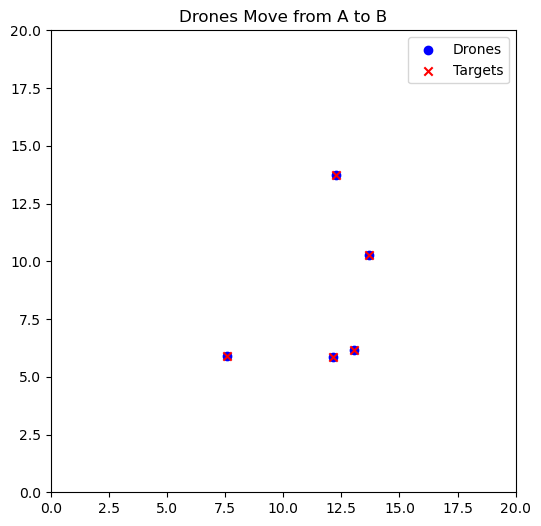

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Simulation settings
n_drones = 5
positions = np.random.rand(n_drones, 2) * 10  # Random starting points
targets = np.random.rand(n_drones, 2) * 10 + 5  # Random targets shifted away
learning_rate = 0.05  # Step size towards target

fig, ax = plt.subplots(figsize=(6,6))
sc = ax.scatter(positions[:,0], positions[:,1], c='blue', label='Drones')
target_sc = ax.scatter(targets[:,0], targets[:,1], c='red', marker='x', label='Targets')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)
ax.legend()
ax.set_title('Drones Move from A to B')

# Pause control
is_paused = False

def update(frame):
    global positions, is_paused
    if not is_paused:
        direction = targets - positions  # Vector toward targets
        positions += learning_rate * direction  # Move towards target
        sc.set_offsets(positions)
    return sc,

def on_click(event):
    global is_paused
    if event.inaxes is not None:
        is_paused = not is_paused

# Connect pause/play
fig.canvas.mpl_connect('button_press_event', on_click)

# Animate
anim = FuncAnimation(fig, update, frames=300, interval=100, blit=True)

# Display
HTML(anim.to_jshtml())